<a href="https://colab.research.google.com/github/BlueSpirit7/Complete-Python-3-Bootcamp/blob/master/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.shape

(768, 10)

In [6]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


df = df.rename(columns=column_names)

In [48]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

In [12]:
import seaborn as sns

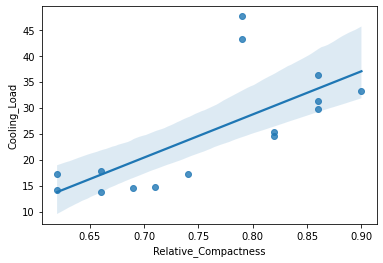

In [13]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
            data=simple_linear_reg_df)

In [39]:
#normalisation
from    sklearn.preprocessing    import    MinMaxScaler 
scaler    =    MinMaxScaler() 
normalised_df    =    pd.DataFrame(scaler.fit_transform(df),    columns=df.columns) 
features_df    =    normalised_df.drop(columns=[ 'Heating_Load' ,    'Cooling_Load' ]) 
heating_target    =    normalised_df[ 'Heating_Load' ]

In [18]:
#Now,    we    split    our    dataset    into    the    training    and    testing    dataset.    Recall    that    we had    earlier    segmented    the    features    and    target    variables. 
from    sklearn.model_selection    import    train_test_split 
x_train,    x_test,    y_train,    y_test    =    train_test_split(features_df,    heating_target, test_size= 0.3 ,    random_state= 1) 

In [23]:
from sklearn.linear_model import LinearRegression
linear_model    =    LinearRegression() 
#fit    the    model    to    the    training    dataset 
linear_model.fit(x_train,    y_train)

LinearRegression()

In [24]:
#obtain    predictions 
predicted_values    =    linear_model.predict(x_test)

In [27]:
#MAE 
from    sklearn.metrics    import    mean_absolute_error 
mae    =    mean_absolute_error(y_test,    predicted_values) 
round(mae,    3 )   #prints    0.063

0.063

In [28]:
#RSS
import    numpy    as    np 
rss    =    np.sum(np.square(y_test    -    predicted_values)) 
round(rss,    3 )        #prints    1.823

1.823

In [29]:
#rootmeansquare
from    sklearn.metrics    import      mean_squared_error 
rmse    =    np.sqrt(mean_squared_error(y_test,    predicted_values)) 
round(rmse,    3 ) #prints    0.089 

0.089

In [30]:
#r-squared
from    sklearn.metrics    import    r2_score 
r2_score    =    r2_score(y_test,    predicted_values) 
round(r2_score,    3 )  #prints    0.893 

0.893

In [32]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test, predicted_values))

MSE 0.007892443045658558


In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [35]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [38]:
#comparing the effects of regularisation
def get_weights_df(linear_model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000
